In [17]:
import numpy as np

def LU(A):
    
    # Find dimension of A
    n = A.shape[0]
    
    # Initialise L=I, U=A
    L = np.eye(n) 
    U = np.copy(A)

    for k in range(n - 1): # loop over columns 1 to n-1
        for j in range(k + 1, n): # loop over rows k+1 to n
            L[j, k] = U[j, k] / U[k ,k] # compute the multiplier l_jk
            U[j, k:] = U[j, k:] - L[j, k] * U[k, k:] # subtract a multiple of row k 
                                                     # from row j to create zeros 
                                                     # below the diagonal in column k
    
    return L, U # return the LU factorisation of A

### Question 1: Answers

**1(a)** 
### LU-TRI Pseudo-code

**Input:** 
- Vector `a` = [a_2,..., a_n] ∈ ℝ^(n-1)
- Vector `b` = [b_1,..., b_n] ∈ ℝ^n
- Vector `c` = [c_1,..., c_n-1] ∈ ℝ^(n-1)

**Output:**
- Vector `l` = [l_2,..., l_n] ∈ ℝ^(n-1)
- Vector `u` = [u_1,..., u_n] ∈ ℝ^n
- Vector `v` = [v_1,..., v_n-1] ∈ ℝ^(n-1)

Initialize:
    u[1] = b[1]
    v[1] = c[1]
   
For i = 2 to n:
    l[i] = a[i] / u[i-1]
    u[i] = b[i] - l[i] * v[i-1]
    if i < n:
        v[i] = c[i]


**（1b）**
Analysis of the LU-TRI Algorithm:
Considering the pseudo-code for LU-TRI, the main computational steps are within the loop. Inside this loop, we have:

One division:
l[i] = a[i] / u[i-1]

Two multiplications and one subtraction:
u[i] = b[i] - l[i] * v[i-1]

Given that we execute this loop for n−1 elements (from 2 to n), the total number of operations roughly becomes:
C(n)=3(n-1)
This is of linear time conplexity:O(n)

Analysis of the Standard LU Decomposition:

For a general n×n matrix, the computational complexity for the standard LU decomposition is approximately:
(2/3)*n^3

Comparison:

 When compared to the standard, the LU-TRI algorithm with O(n) is evidently more efficient, especially for large matrices.

This efficiency is due to the sparsity of the tridiagonal matrix. Since the majority of the elements are zero, we don't need to perform a significant number of multiplicative and additive operations, thus drastically reducing the number of operations.


In [18]:
#1(c)
import numpy as np

def LUtri(a, b, c):
    n = len(b)
    
    # Initializing vectors for l, u, and v
    l = np.zeros(n-1)
    u = np.zeros(n)
    v = np.zeros(n-1)
    
    u[0] = b[0]
    v[0] = c[0]
    
    for i in range(1, n):
        l[i-1] = a[i-1] / u[i-1]
        u[i] = b[i] - l[i-1] * v[i-1]
        if i < n - 1:
            v[i] = c[i]
    
    return l, u, v

# Given matrix A
A = np.array([[2, 1, 0], [-1, 3, 1], [0, -2, 1]])

# Extracting diagonals from A
a = np.diag(A, -1)
b = np.diag(A, 0)
c = np.diag(A, 1)

# Applying LUtri to extracted diagonals
l, u, v = LUtri(a, b, c)

print("l:", l)
print("u:", u)
print("v:", v)

#Assemble L and U
L = np.eye(len(A)) + np.diag(l, k=-1)
U = np.diag(u) + np.diag(v, k=1)


#test whether LU=?A
L@U == A

l: [-0.5        -0.57142857]
u: [2.         3.5        1.57142857]
v: [1. 1.]


array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [19]:
#1（d）
# Timing LU factorization
import time
start_time_LU = time.time()
L, U = LU(A)
end_time_LU = time.time()
time_LU = end_time_LU - start_time_LU

# Timing LU-TRI factorization
a = np.diag(A, -1)
b = np.diag(A, 0)
c = np.diag(A, 1)
start_time_LUtri = time.time()
l, u, v = LUtri(a, b, c)
end_time_LUtri = time.time()
time_LUtri = end_time_LUtri - start_time_LUtri

print(f"LU factorization time: {time_LU} seconds")
print(f"LU-TRI factorization time: {time_LUtri} seconds")


LU factorization time: 0.0011987686157226562 seconds
LU-TRI factorization time: 0.00010395050048828125 seconds


In [20]:
def FStri(l, r):
    n = len(r)#dimension
    y = np.zeros(n)
    y[0] = r[0]#initialisation
    for i in range(1, n):
        y[i] = r[i] - l[i-1] * y[i-1]
    return y

def BStri(u, v, y):
    n = len(y)#dimension
    x = np.zeros(n) 
    x[-1] = y[-1] / u[-1]#initialisation
    for i in range(n-2, -1, -1):
        x[i] = (y[i] - v[i] * x[i+1]) / u[i]
    return x

def GEtri(a, b, c, r):
    l, u, v = LUtri(a, b, c)
    y = FStri(l, r)
    x = BStri(u, v, y)
    return x




A = np.array([[1, 2, 0, 0],
              [1, 1,-1, 0],
              [0, 3,-2, 1],
              [0, 0, 1, 3]])

r = np.array([1, 2, 3, 4])

# Extract a, b, and c from the matrix A
a = np.diag(A, -1)
b = np.diag(A, 0)
c = np.diag(A, 1)

# Use GEtri to get the solution
x = GEtri(a, b, c, r)
print(x)


[ 1.25  -0.125 -0.875  1.625]


## Solution for 2(a)

To prove the approximation
$ w''(x) \approx \frac{w(x+h) - 2 w(x) + w(x-h)}{h^2}, $
we can utilize the Taylor series expansion.

Consider the Taylor series expansion of the function \( w(x) \) at the point \( x \):
1. $  w(x+h)  $ can be approximated as:
$ w(x+h) \approx w(x) + h w'(x) + \frac{h^2}{2} w''(x) + O(h^3) $
2. Similarly, \( w(x-h) \) can be approximated as:
$ w(x-h) \approx w(x) - h w'(x) + \frac{h^2}{2} w''(x) - O(h^3) $

Here, \( O(h^3) \) represents the terms of order three and higher.

Subtracting the second expression from the first gives:
$ w(x+h) - w(x-h) \approx 2h w'(x) $
From which,
$ w'(x) \approx \frac{w(x+h) - w(x-h)}{2h} $

However, we are interested in \( w''(x) \). Let's differentiate the above expression once more.

Following the same logic, we have:
$ w''(x) \approx \frac{w'(x+h) - w'(x-h)}{2h} $
Substituting in our previous result for \( w'(x) \), we get:
$ w''(x) \approx \frac{\frac{w(x+2h) - w(x)}{2h} - \frac{w(x) - w(x-2h)}{2h}}{2h} $
$ = \frac{w(x+2h) - 2w(x) + w(x-2h)}{4h^2} $

This isn't the form we want. For the form given above, consider the difference:
$ w(x+h) - 2w(x) + w(x-h) $
Using Taylor expansion, this becomes:
$ w(x+h) - 2w(x) + w(x-h) \approx h^2 w''(x) + 2O(h^3) $

From which we derive:
$ w''(x) \approx \frac{w(x+h) - 2w(x) + w(x-h)}{h^2} $
This ignores terms of \( O(h^3) \) and smaller.

This completes the proof for 2(a).


## Solution for 2(b)

Given the equation:
$ w''(x_j) \approx \frac{w_{j+1} - 2 w_j + w_{j-1}}{h^2} $

From the problem statement, we have the boundary value problem (BVP):
$ w''(x) + \omega^2 w = \omega^2 f(x), \quad w(0) = w(1) = 0 $

Substituting the finite-difference approximation into our BVP, we get:
$ \frac{w_{j+1} - 2 w_j + w_{j-1}}{h^2} + \omega^2 w_j = \omega^2 f(x_j) $

Rearranging this equation:
$ w_{j+1} - (2 + \omega^2 h^2) w_j + w_{j-1} = \omega^2 h^2 f(x_j) $

Given $ w_0 = w_N = 0 $, this equation holds for $j = 1, 2, ..., N-1 $.

Now, we'll express the given system in matrix form:
$ \mathbf{A} \mathbf{w} = \mathbf{r} $

Where:
$\mathbf{w} = (w_1,\cdots,w_{n-1})^\intercal$

r is the right-hand side vector

The matrix $\mathbf{A} \in \mathbb{R}^{(N-1) \times (N-1)} $ is tridiagonal.

Considering the form of our equation, we can derive the following for the tridiagonal matrix:

1. **Sub-diagonal** 
$  \mathbf{a}  $ : This represents the coefficients of \( w_{j-1} \) for \( j = 2, 3, ..., N-1 \). It's of the form:
$ \mathbf{a} = [1/ h^2, 1/ h^2, ... , 1/ h^2] $ total \( N-2 \) entries

2. **Diagonal** $ \mathbf{b} $: This represents the coefficients of \( w_j \). It's of the form:
$ \mathbf{b} = [-2/h^2 + \omega^2 , -2/h^2 + \omega^2, ... , -2/ h^2 + \omega^2] $
(total \( N-1 \) entries)

3. **Super-diagonal** $ \mathbf{c} $: This represents the coefficients of \( w_{j+1} \) for \( j = 1, 2, ..., N-2 \). It's of the form:
$ \mathbf{c} = [1, 1, ... , 1] $
(total \( N-2 \) entries)

For the right-hand side vector:
$ \mathbf{r} = [\omega^2 f(x_1), \omega^2  f(x_2), ... , \omega^2 f(x_{N-1})]^\intercal $

This completes the formulation of the tridiagonal system for the problem in 2(b).


In [21]:
import numpy as np
import matplotlib.pyplot as plt
def BVP(N, omega, f):
    # Set the step size h based on the number of intervals N
    h = 1/N

    # Initialize the lower diagonal (a) of the tridiagonal matrix
    a = np.ones(N-2) / h**2

    # Initialize the main diagonal (b) of the tridiagonal matrix
    b = (-2 / (h**2) + omega**2) * np.ones(N-1)

    # Initialize the upper diagonal (c) of the tridiagonal matrix
    c = np.ones(N-2) / h**2

    # Compute the right-hand side of the linear system, based on omega and the function f
    r = omega**2 * f

    # Solve the tridiagonal linear system using the function GEtri
    w = GEtri(a, b, c, r)
    
    # Return the solution of the linear system
    return w


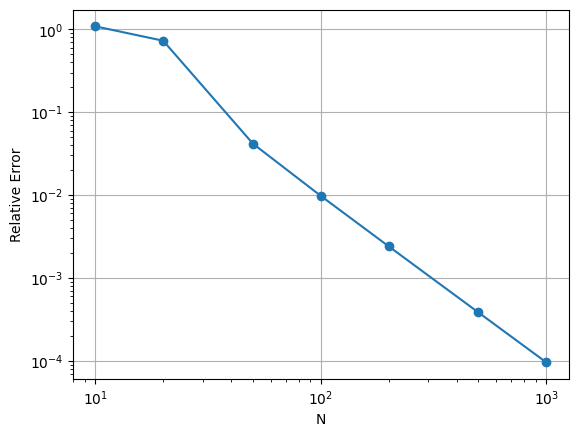

In [22]:
# Define the exact solution function for the boundary value problem
def exact_solution(x, omega):
    # Calculates the exact solution based on the given x and omega values
    return (np.sin(omega) - np.sin(omega * x) - np.sin(omega * (1 - x))) / np.sin(omega)

# Define a function to calculate the relative error between numerical and exact solutions
def calculate_relative_error(w_numerical, w_exact):
    # Calculate the difference between numerical and exact solutions
    error = w_numerical - w_exact

    # Compute the L2 norm of the error
    norm_error = np.linalg.norm(error, ord=2)

    # Compute the L2 norm of the exact solution
    norm_exact = np.linalg.norm(w_exact, ord=2)

    # Calculate and return the relative error
    relative_error = norm_error / norm_exact
    return relative_error

# Set the value of omega for the problem
omega = 20

# Define a list of N values for which the problem will be solved
Ns = [10, 20, 50, 100, 200, 500, 1000]
errors = []

# Loop over each N value to calculate and record the error
for N in Ns:
    # Define the right-hand side function values as a vector of ones
    f = np.ones(N-1)

    # Compute the numerical solution using the BVP function
    w_numerical = BVP(N, omega, f)

    # Generate x values for the exact solution
    x_values = np.linspace(1 / N, 1 - 1 / N, N - 1)

    # Compute the exact solution
    w_exact = exact_solution(x_values, omega)

    # Calculate the relative error between the numerical and exact solutions
    error = calculate_relative_error(w_numerical, w_exact)

    # Append the error to the list of errors
    errors.append(error)

# Plotting the results
import matplotlib.pyplot as plt
plt.plot(Ns, errors, marker='o') # Plot N vs. error with markers
plt.yscale('log') # Set y-axis to logarithmic scale
plt.xscale('log') # Set x-axis to logarithmic scale
plt.xlabel('N') # Label for x-axis
plt.ylabel('Relative Error') # Label for y-axis
plt.grid() # Add grid to the plot for better readability
plt.show() # Display the plot


### Question 3: Answers

**3(a)** ...

In [23]:
import numpy as np
import matplotlib.pyplot as plt
def LUtriRec(a, b, c):
    n = len(b)
    m = n // 2
    if n == 1:
        return [], b, []
    else:
        # Split the matrix
        a1, a2 = a[:m-1], a[m:]
        b1, b2 = b[:m], np.copy(b[m:])
        c1, c2 = c[:m-1], c[m:]

        l11, u11, v11 = LUtriRec(a1, b1, c1)

        # Calculations for middle elements
        l_m = a[m-1] / u11[-1]
        v_m = c[m-1]
        b2[0] -= l_m * v_m
        l22, u22, v22 = LUtriRec(a2, b2, c2)

        # Concatenating results
        l = np.concatenate((l11, [l_m], l22))
        u = np.concatenate((u11, u22))
        v = np.concatenate((v11, [v_m], v22))

    return np.array(l), np.array(u), np.array(v)

# Generate a random tridiagonal matrix
n = 3  # Size of the matrix
a = np.random.rand(n-1)  # Sub-diagonal
b = np.random.rand(n)    # Diagonal
c = np.random.rand(n-1)  # Super-diagonal

# Perform LU decomposition
l_rec, u_rec, v_rec = LUtriRec(a, b, c)

# Reconstruct L and U from l_rec, u_rec, and v_rec
L = np.eye(n) + np.diag(l_rec, k=-1)
U = np.diag(u_rec) + np.diag(v_rec, k=1)

# Original tridiagonal matrix
A = np.diag(b) + np.diag(a, -1) + np.diag(c, 1)

# Verify if L @ U equals A
result = np.allclose(L @ U, A)
print("LU decomposition is correct:", result)


LU decomposition is correct: True


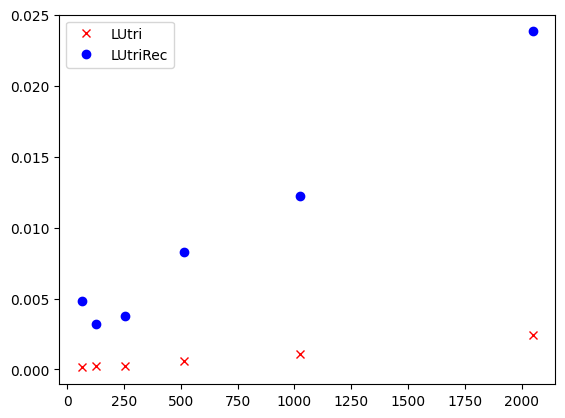

In [24]:
# Initialize lists to store timings and n values
t_LUtri = []       # To store times for LUtri function
t_LUtriRec = []    # To store times for LUtriRec function
n_vals = []        # To store different n values used for testing

# Loop through 6 different sizes for testing
for i in range(6):
    # Determine the size of the matrix (n) to be used
    k = i + 6
    n = 2**k
    n_vals.append(n)  # Store the size of n
    
    # Initialize a tridiagonal matrix A of size n x n
    A = np.zeros((n, n))
    np.fill_diagonal(A, np.random.rand(n))        # Main diagonal
    np.fill_diagonal(A[1:], -np.random.rand(n-1)) # Lower diagonal
    np.fill_diagonal(A[:, 1:], -np.random.rand(n-1)) # Upper diagonal
    
    # Extract diagonals to use in LU decomposition
    a = np.diag(A, k=-1) # Lower diagonal
    b = np.diag(A)       # Main diagonal
    c = np.diag(A, k=1)  # Upper diagonal
    
    # Time the LUtri function
    t0 = time.time()
    l, u, v = LUtri(a, b, c)
    t_LUtri.append(time.time() - t0)
    
    # Time the LUtriRec function
    t0 = time.time()
    l, u, v = LUtriRec(a, b, c)
    t_LUtriRec.append(time.time() - t0)

# Plotting the results

fig, ax = plt.subplots(1, 1)
ax.plot(n_vals, t_LUtri, 'rx', label='LUtri')        # Plot times for LUtri
ax.plot(n_vals, t_LUtriRec, 'bo', label='LUtriRec')  # Plot times for LUtriRec
ax.legend()  # Add a legend
plt.show()   # Display the plot


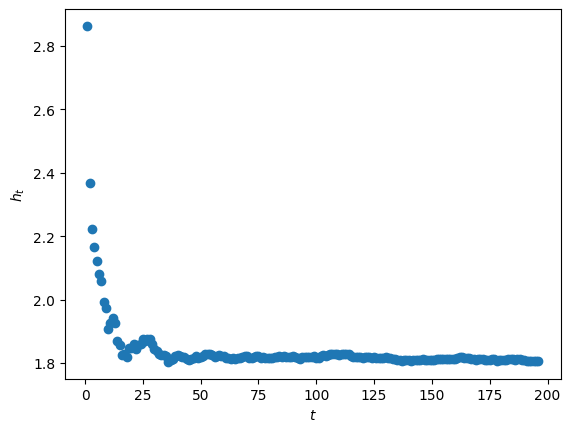

In [25]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

n = 10 # dimension of x_t
sigma = 2 # standard deviation of entries of random matrices

t_end = 200 # maximum of t

t = [k for k in range(1,t_end+1)] # list if values of t
x = np.ones(n) # initialise  x_0
h = np.zeros(len(t)) # list of h_t = t^{-1} log ||x_t|| 
for k in range(t_end):
    A = random.normal(0,sigma,(n,n)) # draw random matrix
    x = A @ x
    h[k] = np.log(np.linalg.norm(x,2))/t[k]
    #print(np.linalg.norm(x,2),t[k])


plt.plot(t,h,'o')
plt.xlabel('$t$')
plt.ylabel('$h_t$')
plt.show()
    

**4(a)** The code above crashes for large $n$ because of overflow: $\| \mathbf{x}_t \|$ becomes too large for the floating point representation. This makes it unusable to estimate $\lambda_1$ accurately. To address this, consider the unit vectors $\mathbf{y}_t = \mathbf{x}_t / \| \mathbf{x}_t \|$. 

(i) Show that that they satisfy $\mathbf{y}_t = \mathbf{A}_t \mathbf{y}_{t-1} /  \| \mathbf{A}_t \mathbf{y}_{t-1} \|$.

(ii) Show that $h_t = t^{-1} \sum_{k=1}^t \ln r_k$, where $r_t =  \| \mathbf{A}_t \mathbf{y}_{t-1} \|$, assuming that $\| \mathbf{x}_0 \| = 1$.

(iii) Write a function `LYA1` that estimates $\lambda_1$ based on (i) and (ii). The function should take $n$, $\sigma$ and $t$ as inputs and return the sequence $(h_{j})$ for $j=1,2,\cdots,t$ which converges to $\lambda_1$. Use your function to estimate $\lambda_1$ for random matrices with $n=10$ and normal entries with zero mean and standard deviation $\sigma = 2$. 

**4(b)** A more refined characterisation of the dynamics of $\mathbf{x}_t$ is provided by the full set of Lyapunov exponents $\lambda_1 \ge \lambda_2 \ge \cdots \ge \lambda_n$. These are defined by 
$$
\lambda_1 + \cdots + \lambda_k = \lim_{t \to \infty} t^{-1} \ln  V(\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t).
$$
Here $V(\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t)$ is the volume of the $k$-dimensional parallelepiped spanned by vectors $\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t$ each evolving according to (**) starting from linearly independent $\mathbf{x}^{(1)}_0,\cdots,\mathbf{x}^{(k)}_0$. This volume can be defined as
$$
V(\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t) = | \det (\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t,\mathbf{u}^{(1)},\cdots,\mathbf{u}^{(n-k)})|,
$$
where $(\mathbf{u}^{(1)},\cdots,\mathbf{u}^{(n-k)})$ are $n-k$ orthonormal vectors also orthogonal to $\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t$. (To see why this makes sense, think of the case $n=3$: for $k=1$ the volume is the length of $\mathbf{x}^{(1)}_t$, for $k=2$ it is the area of the parallelogram spanned by $(\mathbf{x}^{(1)}_t,\mathbf{x}^{(2)}_t)$, and for $k=3$ it is the volume of the parallelepiped spanned by  $(\mathbf{x}^{(1)}_t,\mathbf{x}^{(2)}_t,\mathbf{x}^{(3)}_t)$.)

(i) Show that 
$$
\lambda_k = \lim_{t \to \infty} t^{-1} \ln |r_{kk}|, \qquad \qquad (***)
$$ 
where $r_{kk}$ is the $k$th diagonal entry of $\mathbf{R}$, the upper triangular matrix in the QR factorisation of the matrix product $\mathbf{A}_t \cdots \mathbf{A}_1 = \mathbf{Q} \mathbf{R}$. (Hint: consider the QR factorisation of $[\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t,\mathbf{u}^{(1)},\cdots,\mathbf{u}^{(n-k)}]$.)

(ii) Write an algorithm for the estimation of $\lambda_k, \, k=1,\cdots, n$, based on (***). For stability, the algorithm should not evaluate $\mathbf{A}_t \cdots \mathbf{A}_1$. (Hint: first show that $\mathbf{A}_t \cdots \mathbf{A}_1 = \mathbf{Q}_t \mathbf{R}_t \mathbf{R}_{t-1}\cdots \mathbf{R}_1$, where $\mathbf{Q}_j \mathbf{R}_j$ is the QR factorisation of $\mathbf{A}_j \mathbf{Q}_{j-1}$, with $\mathbf{A}_1 = \mathbf{Q}_1 \mathbf{R}_1$.)

(iii) Implement your algorithm in (iii) as a function `LYAall`. For the matrices with normal entries there is a lovely closed-form formula:
$$
\lambda_k = \log \sigma + \tfrac{1}{2} \left( \log 2 + \Psi( (n-k+1)/2) \right),
$$
where $\Psi$ is the digamma function (available as `scipy.special.digamma` in Python). Write a code that produces a table showing the numerical estimates of $\lambda_k$, the exact values  and the relative errors (in percent) for fixed $n$, $\sigma$ and $t$. Show your table for $n=10, \, \sigma = 2, \, t = 10000$.

### Question: Answers

**4(a)** ...


### 4(a)(i)

To show that the unit vectors $\mathbf{y}_t = \frac{\mathbf{x}_t}{\| \mathbf{x}_t \|}$ satisfy the given relationship, we start with the update rule $\mathbf{x}_{t} = \mathbf{A}_t \mathbf{x}_{t-1}$. By definition, $\mathbf{y}_{t} = \frac{\mathbf{x}_{t}}{\|\mathbf{x}_{t}\|}$, and similarly for $\mathbf{y}_{t-1}$:


$ \mathbf{y}_{t-1} = \frac{\mathbf{x}_{t-1}}{\|\mathbf{x}_{t-1}\|} $

Now, using the original update rule and substituting $\mathbf{x}_{t}$ and $\mathbf{x}_{t-1}$, we have:
$
\mathbf{y}_{t} = \frac{\mathbf{A}_t \mathbf{x}_{t-1}}{\|\mathbf{A}_t \mathbf{x}_{t-1}\|} = \frac{\mathbf{A}_t (\mathbf{y}_{t-1} \|\mathbf{x}_{t-1}\|)}{\|\mathbf{A}_t (\mathbf{y}_{t-1} \|\mathbf{x}_{t-1}\|)\|}
$

Since the norm of a scalar multiple of a vector is just the absolute value of the scalar times the norm of the vector, this simplifies to:

$
\mathbf{y}_{t} = \frac{\mathbf{A}_t \mathbf{y}_{t-1}}{\|\mathbf{A}_t \mathbf{y}_{t-1}\|}
$

This shows that the unit vector $\mathbf{y}_t$ is the result of applying the matrix $\mathbf{A}_t$ to $\mathbf{y}_{t-1}$ and then normalizing the result.

### 4(a)(ii)

Given that $\| \mathbf{x}_0 \| = 1$ and using the definition of $r_t$ as $r_t = \| \mathbf{A}_t \mathbf{y}_{t-1} \|$, we want to show that $h_t = t^{-1} \sum_{k=1}^t \ln r_k$. Starting with the definition of $h_t$:

$
h_t = \frac{1}{t} \log \| \mathbf{x}_t \|
$

we note that $\| \mathbf{x}_t \|$ can be expressed as the product of $r_k$ for $k = 1$ to $t$ because of the recursive relationship:

$
\| \mathbf{x}_t \| = \| \mathbf{A}_t \mathbf{x}_{t-1} \| = r_t \| \mathbf{x}_{t-1} \| = r_t r_{t-1} \dots r_1 \| \mathbf{x}_0 \|
$

Given that $\| \mathbf{x}_0 \| = 1$, we can then write:
$
h_t = \frac{1}{t} \log \left( \prod_{k=1}^t r_k \right) = \frac{1}{t} \sum_{k=1}^t \log r_k
$

This shows that $h_t$ is the average of the logarithms of $r_k$, which represents the rate of expansion at each step normalized by the time step $t$.


Estimated largest Lyapunov exponent (lambda_1) is: 1.790897731134734


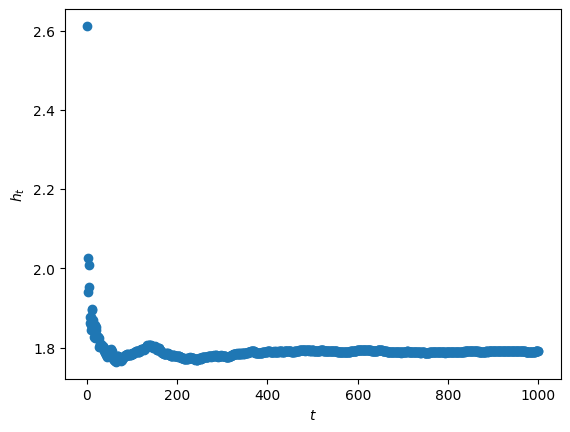

In [26]:
import numpy as np
from scipy.linalg import qr
from scipy.special import digamma

def LYA1(n, sigma, t_end):
    # Initialize x to be a unit vector of dimension n
    x = np.ones(n)
    # Initialize an array to hold values of h_t for each time step
    h = np.zeros(t_end)
    # Initialize sum_log_r to accumulate the sum of the logarithms of r_k
    sum_log_r = 0

    # Loop over each time step
    for t in range(1, t_end + 1):
        # Draw a random matrix A with entries from a normal distribution
        A = np.random.normal(0, sigma, (n, n))
        # Calculate r_t as the norm of A times the previous vector y_{t-1}
        r_t = np.linalg.norm(A @ x, 2)
        # Update the sum of the logs of r_t
        sum_log_r += np.log(r_t)
        # Update the vector x to be the new y_t, normalized by r_t
        x = A @ x / r_t
        # Calculate h_t for this time step and store it in the array
        h[t-1] = sum_log_r / t

    return h

# Use the function to estimate lambda_1 for the given parameters
n = 10
sigma = 2
t_end = 1000  # A larger t_end gives a more accurate estimate but takes longer to compute
h_sequence = LYA1(n, sigma, t_end)

# The last value in the sequence h_sequence is our estimate for lambda_1
lambda_1_estimate = h_sequence[-1]
print(f"Estimated largest Lyapunov exponent (lambda_1) is: {lambda_1_estimate}")

# Plot
plt.plot(range(1, t_end + 1), h_sequence, 'o')
plt.xlabel('$t$')
plt.ylabel('$h_t$')
plt.show()

### Answer for 4(b)(i):

To prove the equation

$$
\lambda_k = \lim_{t \to \infty} \frac{1}{t} \ln |r_{kk}|,
$$

where kk is the kth diagonal entry of R, the upper triangular matrix in the QR decomposition of the matrix product $\mathbf{A}_t \cdots \mathbf{A}_1 = \mathbf{Q} \mathbf{R}$, we use the properties of QR decomposition in the context of the dynamical system defined by the iterative application of random matrices $\mathbf{A}_t$.

The QR decomposition represents $\mathbf{A}_t \cdots \mathbf{A}_1$ as a product of an orthogonal matrix $\mathbf{Q}$ and an upper triangular matrix $\mathbf{R}$. Since $\mathbf{Q}$ is orthogonal, it does not change the norm of the vectors it multiplies, thus the norm scaling is entirely captured by the $\mathbf{R}$ matrix.

The k th diagonal element $r_{kk}$ of $\mathbf{R}$ corresponds to the growth factor along the k th dimension due to the transformation by $\mathbf{A}_t \cdots \mathbf{A}_1$. Taking the logarithm of $r_{kk}$ gives the rate of expansion (or contraction) for the k th dimension at step t.

The Lyapunov exponent $\lambda_k$ quantifies the average exponential rate of divergence or convergence of a trajectory in the system along the `$k$`th dimension. To obtain this rate, we average the natural logarithm of the absolute value of $r_{kk}$ over time t.

The limit expression

$$
\lambda_k = \lim_{t \to \infty} \frac{1}{t} \ln |r_{kk}|,
$$

provides the average growth rate across time, thereby defining the k th Lyapunov exponent $\lambda_k$, which characterizes the average exponential rate of separation of trajectories in the state space along the k th dimension.



To estimate the Lyapunov exponents $\lambda_k$ for $k=1,\ldots,n$, we avoid the direct computation of the product $\mathbf{A}_t \cdots \mathbf{A}_1$ due to numerical instability concerns. Instead, we utilize a recursive application of QR decomposition. Here's an algorithmic approach:

1. Start with $t=1$ and perform a QR decomposition on $\mathbf{A}_1$ to obtain $\mathbf{Q}_1$ and $\mathbf{R}_1$.
2. For each $t > 1$:
   - Compute $\mathbf{A}_t \mathbf{Q}_{t-1}$ to form a new matrix.
   - Perform QR decomposition on this new matrix to get $\mathbf{Q}_t$ and $\mathbf{R}_t$.
   - Update the $r_{kk}$ value, which is the $k^{th}$ diagonal element of each $\mathbf{R}_t$ matrix.
3. For each $k$, compute the estimate for $\lambda_k$ as the average of $\ln |r_{kk}|$ over time.

In [27]:
def LYAall(n, sigma, t_end):
    Q = np.eye(n)  # Initialize identity matrix as Q_0
    sums_log_r_diagonal = np.zeros(n)
    
    for t in range(1, t_end + 1):
        A = np.random.normal(0, sigma, (n, n))
        M = np.dot(A, Q)  # Compute A_t Q_{t-1}
        Q, R = qr(M)  # Perform QR decomposition on M to get Q_t and R_t
        sums_log_r_diagonal += np.log(np.abs(np.diag(R)))  # Update the log of the diagonal elements of R
    
    lyapunov_exponents = sums_log_r_diagonal / t_end
    return lyapunov_exponents

# Exact Lyapunov exponents
def exact_lyapunov(n, sigma):
    return [np.log(sigma) + 0.5 * (np.log(2) + digamma((n - k + 1) / 2)) for k in range(1, n + 1)]

# Display results
def display_results(n, sigma, t_end):
    estimated = LYAall(n, sigma, t_end)
    exact = exact_lyapunov(n, sigma)
    relative_errors = np.abs((estimated - exact) / exact) * 100
    
    print(f"{'k':<4}{'Estimated':<20}{'Exact':<20}{'Relative Error (%)':<20}")
    for k in range(n):
        print(f"{k+1:<4}{estimated[k]:<20}{exact[k]:<20}{relative_errors[k]:<20.2f}")

# Using the function to display results for given parameters
n = 10
sigma = 2
t_end = 10000
display_results(n, sigma, t_end)


k   Estimated           Exact               Relative Error (%)  
1   1.7931343158092943  1.7927796050558182  0.02                
2   1.7303285977537253  1.7341562340196823  0.22                
3   1.66401489785404    1.6677796050558182  0.23                
4   1.5912742112741018  1.5912990911625395  0.00                
5   1.4990371612003972  1.5011129383891515  0.14                
6   1.391038094585229   1.3912990911625394  0.02                
7   1.2461488137282093  1.2511129383891515  0.40                
8   1.0610199294393061  1.0579657578292063  0.29                
9   0.7499874675937849  0.7511129383891515  0.15                
10  0.06511532794778446 0.05796575782920621 12.33               
